# Importando bibliotecas

Neste arquivo, serão testados diferentes modelos estudados recentemente. Será feita a comparação de métodos do scikit learn e tensorflow

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Dados

In [297]:
dados = pd.read_excel('Hydrothermal1.xlsx')

estudo = pd.DataFrame(dados)

In [298]:
estudo = estudo.drop(estudo.columns[0], axis=1)
estudo

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação,Eficiência de hidrólise (%),Eficiência de fermentação (%),Eficiência global em etanol (%),Produtividade global em etanol (g/(L.h))
0,14.05,9.05,13.3,58.87,92.81,54.64,0.41
1,25.95,9.05,13.3,75.94,88.32,67.07,0.51
2,14.05,20.95,13.3,53.28,87.21,46.47,0.80
3,25.95,20.95,13.3,58.19,90.49,52.66,0.92
4,14.05,9.05,34.7,82.00,82.65,67.78,0.33
5,25.95,9.05,34.7,91.61,80.34,73.60,0.35
6,14.05,20.95,34.7,61.08,96.47,58.92,0.65
7,25.95,20.95,34.7,70.81,96.73,68.50,0.76
8,10.00,15.00,24.0,51.70,95.57,49.41,0.48
9,30.00,15.00,24.0,74.56,97.28,72.53,0.71


In [299]:
estudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Concentração de enzimas                   20 non-null     float64
 1   Concentração de biomassa                  20 non-null     float64
 2   Tempo de pré-sacarificação                20 non-null     float64
 3   Eficiência de hidrólise (%)               20 non-null     float64
 4   Eficiência de fermentação (%)             20 non-null     float64
 5   Eficiência global em etanol (%)           20 non-null     float64
 6   Produtividade global em etanol (g/(L.h))  20 non-null     float64
dtypes: float64(7)
memory usage: 1.2 KB


In [300]:
estudo.describe()

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação,Eficiência de hidrólise (%),Eficiência de fermentação (%),Eficiência global em etanol (%),Produtividade global em etanol (g/(L.h))
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,20.000000,15.000000,24.000000,70.212000,89.444500,62.428000,0.610500
std,5.043078,5.043078,9.072573,10.933717,5.913391,7.973254,0.193676
min,10.000000,5.000000,6.000000,51.700000,74.730000,46.470000,0.190000
25%,18.512500,13.512500,21.325000,58.860000,87.570000,54.895000,0.495000
50%,20.000000,15.000000,24.000000,74.045000,89.745000,64.615000,0.635000
75%,21.487500,16.487500,26.675000,76.800000,93.530000,68.572500,0.722500
max,30.000000,25.000000,42.000000,91.610000,97.280000,73.600000,0.920000


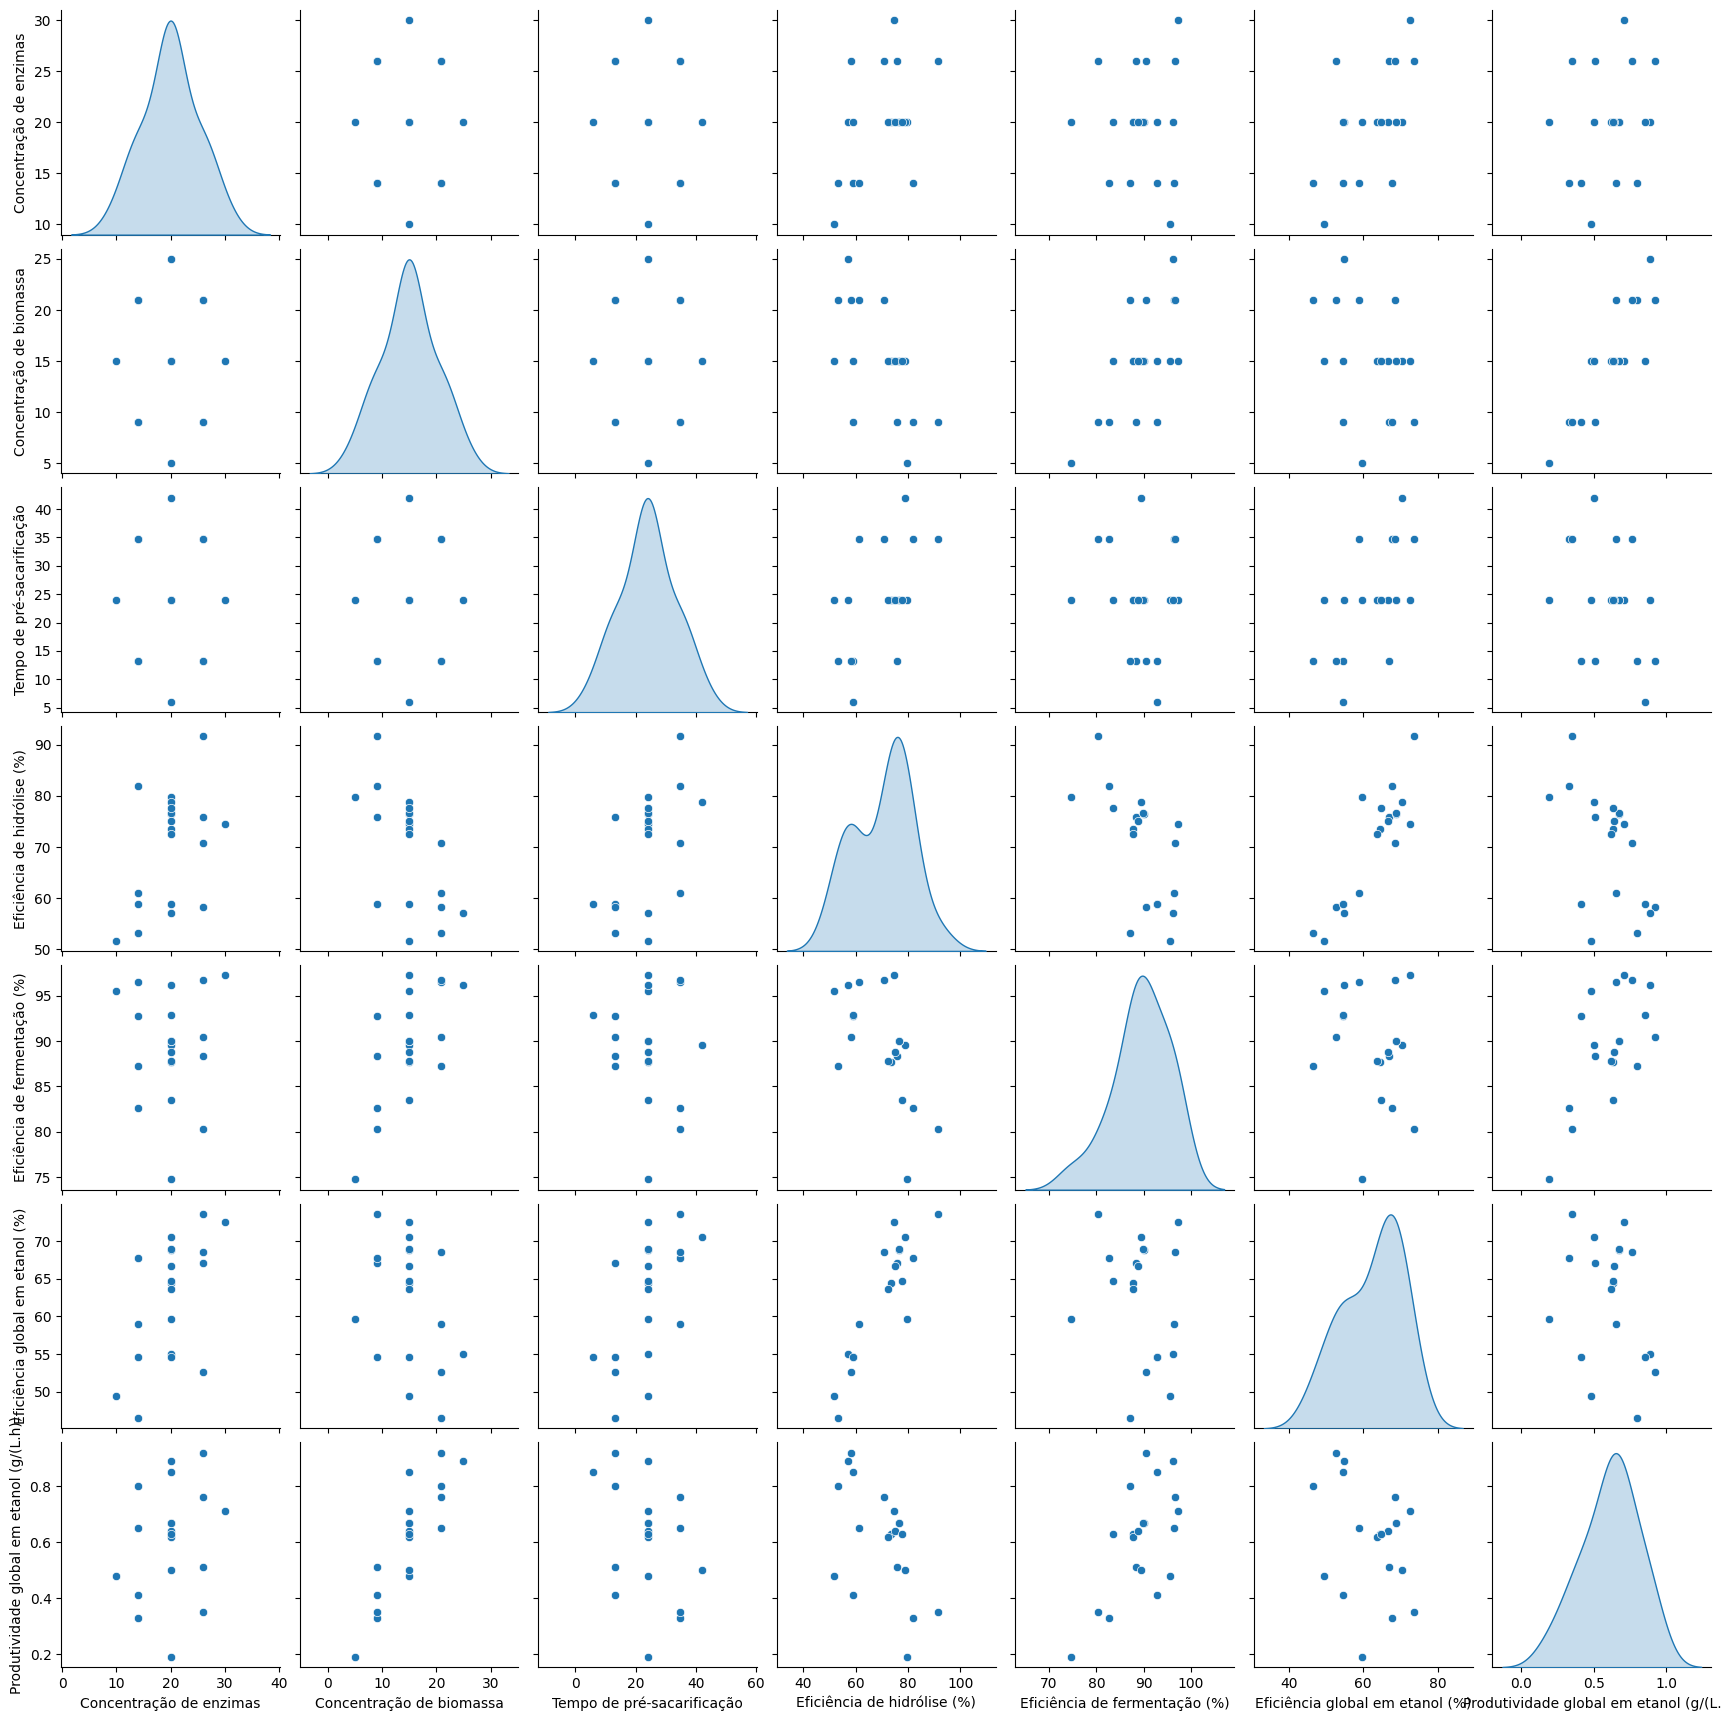

In [301]:
sns.pairplot(estudo, diag_kind='kde')

# Random Forests

In [302]:
x = estudo[['Concentração de enzimas', 'Concentração de biomassa', 'Tempo de pré-sacarificação',
            #'Eficiência de hidrólise (%)','Eficiência de fermentação (%)','Eficiência global em etanol (%)'
            ]]
x

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação
0,14.05,9.05,13.3
1,25.95,9.05,13.3
2,14.05,20.95,13.3
3,25.95,20.95,13.3
4,14.05,9.05,34.7
5,25.95,9.05,34.7
6,14.05,20.95,34.7
7,25.95,20.95,34.7
8,10.00,15.00,24.0
9,30.00,15.00,24.0


In [303]:
y = estudo[['Produtividade global em etanol (g/(L.h))']]
y

,Produtividade global em etanol (g/(L.h))
0,0.41
1,0.51
2,0.80
3,0.92
4,0.33
5,0.35
6,0.65
7,0.76
8,0.48
9,0.71


In [304]:
# Construindo o modelo

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [305]:
x_test

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação
19,20.00,15.00,24.0
14,20.00,15.00,24.0
6,14.05,20.95,34.7
9,30.00,15.00,24.0
15,20.00,15.00,24.0
7,25.95,20.95,34.7


In [306]:
x_train

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação
13,20.00,15.00,42.0
5,25.95,9.05,34.7
2,14.05,20.95,13.3
4,14.05,9.05,34.7
8,10.00,15.00,24.0
12,20.00,15.00,6.0
17,20.00,15.00,24.0
10,20.00,5.00,24.0
1,25.95,9.05,13.3
18,20.00,15.00,24.0


In [307]:
y_test

,Produtividade global em etanol (g/(L.h))
19,0.63
14,0.63
6,0.65
9,0.71
15,0.62
7,0.76


In [308]:
y_train

,Produtividade global em etanol (g/(L.h))
13,0.50
5,0.35
2,0.80
4,0.33
8,0.48
12,0.85
17,0.67
10,0.19
1,0.51
18,0.64


In [309]:
floresta = RandomForestRegressor(n_estimators=200)
floresta.fit(x_train,y_train)

C:\Users\audec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=200)

In [310]:
y_pred = floresta.predict(x_test)
y_pred

array([0.65416964, 0.65416964, 0.7056625 , 0.65069214, 0.65416964,
       0.7565525 ])

In [311]:
mse = mean_squared_error(y_test, y_pred)
print("Erro Quadrático Médio:", mse)

Erro Quadrático Médio: 0.0014939214743409767


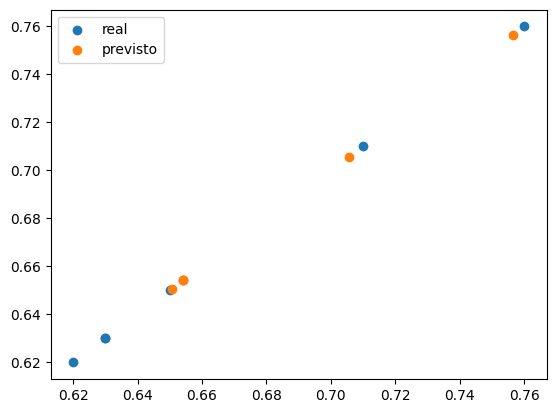

In [312]:
plt.scatter(y_test,y_test, label = 'real')
plt.scatter(y_pred,y_pred, label = 'previsto')

# plt.scatter(np.array(estudo['Eficiência global em etanol (%)']),y_pred , label = 'Previsto')
# plt.scatter(np.array(estudo['Eficiência global em etanol (%)']),y_test , label = 'Real')
# plt.xlabel('Eficiência global em etanol (%)')
# plt.ylabel('Produtividade global em etanol (g/(L.h))')
plt.legend()

<Axes: >

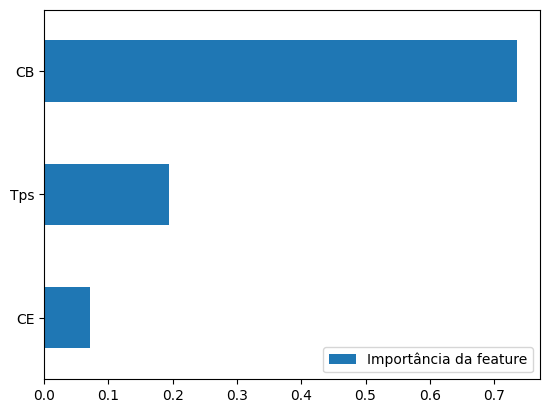

In [313]:
importante = pd.DataFrame(floresta.feature_importances_,
                          index = ['CE', 'CB', 'Tps',
                                  #  'Eficiência de hidrólise (%)',
                                  #  'Eficiência de fermentação (%)',
                                  #  'Eficiência global em etanol (%)'
                                   ],
                          columns = ['Importância da feature']).sort_values('Importância da feature', ascending=True)

importante.plot(kind='barh')

# Redes neurais com tensorflow

In [373]:
train_dataset = x.sample(frac=0.8, random_state=0)
test_dataset = x.drop(train_dataset.index)

In [374]:
train_dataset

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação
18,20.00,15.00,24.0
1,25.95,9.05,13.3
19,20.00,15.00,24.0
8,10.00,15.00,24.0
10,20.00,5.00,24.0
17,20.00,15.00,24.0
6,14.05,20.95,34.7
13,20.00,15.00,42.0
4,14.05,9.05,34.7
2,14.05,20.95,13.3


In [375]:
test_dataset

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação
0,14.05,9.05,13.3
3,25.95,20.95,13.3
12,20.00,15.00,6.0
15,20.00,15.00,24.0


In [376]:
train_features

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação
18,20.00,15.00,24.0
1,25.95,9.05,13.3
19,20.00,15.00,24.0
8,10.00,15.00,24.0
10,20.00,5.00,24.0
17,20.00,15.00,24.0
6,14.05,20.95,34.7
13,20.00,15.00,42.0
4,14.05,9.05,34.7
2,14.05,20.95,13.3


In [377]:
test_features

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação
0,14.05,9.05,13.3
3,25.95,20.95,13.3
12,20.00,15.00,6.0
15,20.00,15.00,24.0


In [378]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [379]:
normalizer.adapt(np.array(train_features))

In [380]:
print(normalizer.mean.numpy())

[[20.     15.     26.4625]]


In [381]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[20. 15. 24.]]

Normalized: [[ 0.    0.   -0.33]]


In [382]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Produtividade global em etanol (g/(L.h))]')
  plt.legend()
  plt.grid(True)

In [383]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(20, activation='sigmoid'),
 #     layers.Dense(20, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [384]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (16, 3)                │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7 (32.00 B)

In [385]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=200)

CPU times: total: 2.69 s
Wall time: 16.1 s


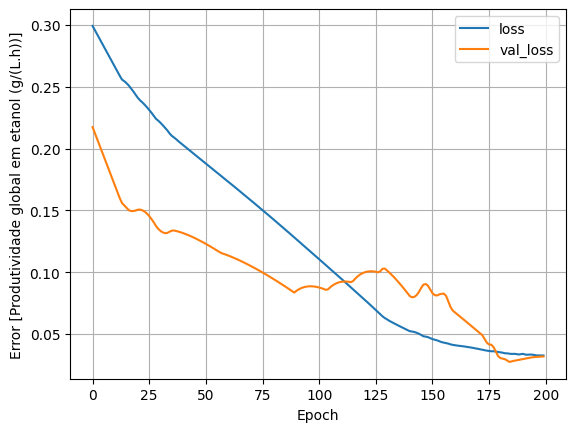

In [386]:
plot_loss(history)

In [387]:
test_results = {}

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error [Tps]']).T

,Mean absolute error [Tps]
dnn_model,0.053741


In [388]:
pred = dnn_model.predict(test_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


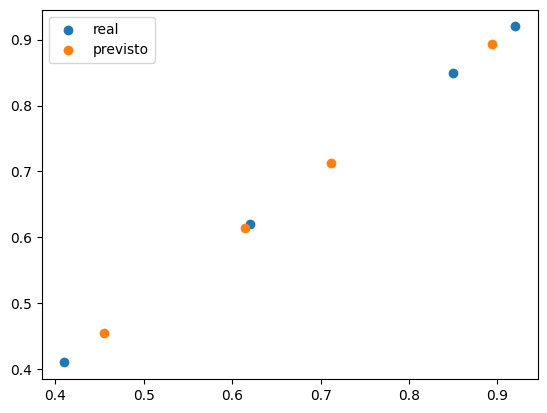

In [389]:
plt.scatter(test_labels,test_labels, label = 'real')
plt.scatter(pred,pred, label = 'previsto')

# plt.scatter(np.array(estudo['Eficiência global em etanol (%)']),y_pred , label = 'Previsto')
# plt.scatter(np.array(estudo['Eficiência global em etanol (%)']),y_test , label = 'Real')
# plt.xlabel('Eficiência global em etanol (%)')
# plt.ylabel('Produtividade global em etanol (g/(L.h))')
plt.legend()

# Novos testes

In [390]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('Hydrothermal1.xlsx')
df = df.drop(df.columns[0], axis=1)  # Remove a primeira coluna

scaler = MinMaxScaler()
normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
normalizado

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação,Eficiência de hidrólise (%),Eficiência de fermentação (%),Eficiência global em etanol (%),Produtividade global em etanol (g/(L.h))
0,0.2025,0.2025,0.202778,0.179654,0.801774,0.301143,0.301370
1,0.7975,0.2025,0.202778,0.607367,0.602661,0.759307,0.438356
2,0.2025,0.7975,0.202778,0.039589,0.553437,0.000000,0.835616
3,0.7975,0.7975,0.202778,0.162616,0.698891,0.228161,1.000000
4,0.2025,0.2025,0.797222,0.759208,0.351220,0.785477,0.191781
5,0.7975,0.2025,0.797222,1.000000,0.248780,1.000000,0.219178
6,0.2025,0.7975,0.797222,0.235029,0.964080,0.458902,0.630137
7,0.7975,0.7975,0.797222,0.478827,0.975610,0.812016,0.780822
8,0.0000,0.5000,0.500000,0.000000,0.924169,0.108367,0.397260
9,1.0000,0.5000,0.500000,0.572789,1.000000,0.960560,0.712329


In [391]:
normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Concentração de enzimas                   20 non-null     float64
 1   Concentração de biomassa                  20 non-null     float64
 2   Tempo de pré-sacarificação                20 non-null     float64
 3   Eficiência de hidrólise (%)               20 non-null     float64
 4   Eficiência de fermentação (%)             20 non-null     float64
 5   Eficiência global em etanol (%)           20 non-null     float64
 6   Produtividade global em etanol (g/(L.h))  20 non-null     float64
dtypes: float64(7)
memory usage: 1.2 KB


In [392]:
normalizado

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação,Eficiência de hidrólise (%),Eficiência de fermentação (%),Eficiência global em etanol (%),Produtividade global em etanol (g/(L.h))
0,0.2025,0.2025,0.202778,0.179654,0.801774,0.301143,0.301370
1,0.7975,0.2025,0.202778,0.607367,0.602661,0.759307,0.438356
2,0.2025,0.7975,0.202778,0.039589,0.553437,0.000000,0.835616
3,0.7975,0.7975,0.202778,0.162616,0.698891,0.228161,1.000000
4,0.2025,0.2025,0.797222,0.759208,0.351220,0.785477,0.191781
5,0.7975,0.2025,0.797222,1.000000,0.248780,1.000000,0.219178
6,0.2025,0.7975,0.797222,0.235029,0.964080,0.458902,0.630137
7,0.7975,0.7975,0.797222,0.478827,0.975610,0.812016,0.780822
8,0.0000,0.5000,0.500000,0.000000,0.924169,0.108367,0.397260
9,1.0000,0.5000,0.500000,0.572789,1.000000,0.960560,0.712329


In [393]:
normalizado1 = normalizado[['Concentração de enzimas','Concentração de biomassa','Tempo de pré-sacarificação','Produtividade global em etanol (g/(L.h))']]
normalizado1

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação,Produtividade global em etanol (g/(L.h))
0,0.2025,0.2025,0.202778,0.301370
1,0.7975,0.2025,0.202778,0.438356
2,0.2025,0.7975,0.202778,0.835616
3,0.7975,0.7975,0.202778,1.000000
4,0.2025,0.2025,0.797222,0.191781
5,0.7975,0.2025,0.797222,0.219178
6,0.2025,0.7975,0.797222,0.630137
7,0.7975,0.7975,0.797222,0.780822
8,0.0000,0.5000,0.500000,0.397260
9,1.0000,0.5000,0.500000,0.712329


In [394]:
ent_x=normalizado1[['Concentração de enzimas','Concentração de biomassa','Tempo de pré-sacarificação']]
ent_x

,Concentração de enzimas,Concentração de biomassa,Tempo de pré-sacarificação
0,0.2025,0.2025,0.202778
1,0.7975,0.2025,0.202778
2,0.2025,0.7975,0.202778
3,0.7975,0.7975,0.202778
4,0.2025,0.2025,0.797222
5,0.7975,0.2025,0.797222
6,0.2025,0.7975,0.797222
7,0.7975,0.7975,0.797222
8,0.0000,0.5000,0.500000
9,1.0000,0.5000,0.500000


In [395]:
import numpy as np
xizes = np.array(ent_x)
xizes

array([[0.2025    , 0.2025    , 0.20277778],
       [0.7975    , 0.2025    , 0.20277778],
       [0.2025    , 0.7975    , 0.20277778],
       [0.7975    , 0.7975    , 0.20277778],
       [0.2025    , 0.2025    , 0.79722222],
       [0.7975    , 0.2025    , 0.79722222],
       [0.2025    , 0.7975    , 0.79722222],
       [0.7975    , 0.7975    , 0.79722222],
       [0.        , 0.5       , 0.5       ],
       [1.        , 0.5       , 0.5       ],
       [0.5       , 0.        , 0.5       ],
       [0.5       , 1.        , 0.5       ],
       [0.5       , 0.5       , 0.        ],
       [0.5       , 0.5       , 1.        ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ]])

In [396]:
# Para cada linha na matriz de coeficientes
for linha in xizes:
    # Extrai os valores de x1, x2 e x3 da linha
    x1, x2, x3 = linha[0], linha[1], linha[2]

    # Calcula o valor de P_etOH usando a equação fornecida
    P_etOH = 0.65 + 0.05 * x1 - 0.02 * x1**2 + 0.20 * x2 - 0.04 * x2**2 - 0.08 * x3

    # Imprime o resultado para esta linha
    print("P_etOH:", P_etOH)

P_etOH: 0.6819424027777778
P_etOH: 0.6997924027777778
P_etOH: 0.7771424027777778
P_etOH: 0.7949924027777777
P_etOH: 0.6343868472222223
P_etOH: 0.6522368472222222
P_etOH: 0.7295868472222222
P_etOH: 0.7474368472222221
P_etOH: 0.7
P_etOH: 0.73
P_etOH: 0.63
P_etOH: 0.79
P_etOH: 0.76
P_etOH: 0.68
P_etOH: 0.72
P_etOH: 0.72
P_etOH: 0.72
P_etOH: 0.72
P_etOH: 0.72
P_etOH: 0.72


In [397]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Produtividade global em etanol (g/(L.h))]')
  plt.legend()
  plt.grid(True)

In [398]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(3, activation='sigmoid'),
 #     layers.Dense(20, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [399]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 3)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7 (32.00 B)